In [1]:
from Lab_Equipment.Config import config 

Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff
This is a Windows system.


In [2]:
# Python Libs
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import copy
from IPython.display import display, clear_output
import ipywidgets
# import multiprocessing
# from multiprocessing import shared_memory
import time
import scipy.io
import pickle
import TimeTagger

from scipy import io, integrate, linalg, signal
from scipy.io import savemat, loadmat
from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]

#Moku Libs
import Lab_Equipment.MokuLab.MokuLabObject as mokulib

#SLM Libs
import Lab_Equipment.SLM.pyLCOS as pyLCOS
import Lab_Equipment.ZernikeModule.ZernikeModule as zernMod


# #MPLC Libs
# import Lab_Equipment.MPLC.AlignmentRoutines as AlignRoutines
import Lab_Equipment.AlignmentRoutines.AlignmentRoutines_PowerMeter as AlignPwrMetertLib

# timeTagger
import Lab_Equipment.TimeTagger.TimeTaggerInterface as TimeTaggerMod
import Lab_Equipment.TimeTagger.TimeTaggerFunction as TimetaggerFunc
import Lab_Equipment.TimeTagger.TimeTaggerCustomMeasurementObj as TimeTaggerCustomObj



# Daniel's Python Libs NOTE there is a library in MyPyhtonLibs that causes the powermeter not to work 
# import  Lab_Equipment.MyPythonLibs.OpticalOperators as OpticOp
# import  Lab_Equipment.MyPythonLibs.ComplexPlotFunction as cmplxplt
# # import  Lab_Equipment.MyPythonLibs.GaussianBeamBasis as GaussBeams
# import  Lab_Equipment.MyPythonLibs.GeneralFunctions as GenFuncs
import  Lab_Equipment.MyPythonLibs.FWHMFunctions as FWHMFunc

# Piezo translation stage
import Lab_Equipment.ThorlabsKCube.ThorlabsPiezoStrainGauge as Piezolib

#Power Meter
import Lab_Equipment.PowerMeter.PowerMeterObject as PwrMeterLib

#Rotation Mount
import Lab_Equipment.ElliptecThorlabMounts.ElliptecRotationMountObject as RotMotLib


Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff
Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff


In [3]:
%gui qt5
%load_ext autoreload

#Config File
%aimport Lab_Equipment.Config.config

# moku Lib
%aimport Lab_Equipment.MokuLab.MokuLabObject

#Alignment lib
%aimport Lab_Equipment.AlignmentRoutines.AlignmentRoutines_PowerMeter

# timeTagger
%aimport Lab_Equipment.TimeTagger.TimeTaggerInterface
%aimport Lab_Equipment.TimeTagger.TimeTaggerFunction
%aimport Lab_Equipment.TimeTagger.TimeTaggerCustomMeasurementObj




# power meter
%aimport Lab_Equipment.PowerMeter.PowerMeterObject

# Rotation Mounts
%aimport Lab_Equipment.ElliptecThorlabMounts.ElliptecRotationMountObject

# translation stages
%aimport Lab_Equipment.ThorlabsKCube.ThorlabsPiezoStrainGauge

# Daniel's Python Libs
%aimport Lab_Equipment.MyPythonLibs.FWHMFunctions
%autoreload 1

# Launch rotation Mount

In [60]:
del RotaMountObj

Closing stage connections


In [61]:
#RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[5.5+45,21.872])    # old one
#RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[4.002+45,22.512])    # these offset values are found manually by changing those and checking power
#RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[4.002+45,19.972])
# RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[5.5+45,22])
# RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[14+45,22])
RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8','COM9'],AngleOffset=[20,686+45,43.116])   # as on 26022025

RotaMountObj.HomeStages()

COM8
ELL14/M
 #0 on COM8,
 serial number 11400790,
 status unknown
COM9
ELL14/M
 #0 on COM9,
 serial number 11400791,
 status unknown
(20.689, 0.6890000000000001)
(-0.003, 339.997)
(43.117, 32.11699999999996)
(0.0, 349.0)


# waveplate Calibration

In [16]:
import pyvisa
rm = pyvisa.ResourceManager()
print(rm.list_resources())

('USB0::0x1313::0x8072::P2004984::INSTR', 'ASRL1::INSTR', 'ASRL5::INSTR', 'ASRL8::INSTR', 'ASRL9::INSTR')


In [39]:
del PwrMeterObj

In [4]:
PwrMeterObj=PwrMeterLib.PowerMeterObj(deviceName='USB0::0x1313::0x8072::P2004984::INSTR',AvgCount=50)
# RotaMountObj.SetAngle(0)
PwrMeterObj.SetAverageMeasure(100)
PwrMeterObj.GetPower()

Wavelength set to 925 nm
Units set to W


5.56260193e-06

In [37]:
PwrMeterObj.GetPower()

0.000200471171

In [21]:
RotaMountObj.AngleOffset=17.060000000000002

In [38]:
RotaMountObj.AngleOffset=14+45

In [21]:
del RotaMountObj

Closing stage connections


In [22]:
RotaMountObj=RotMotLib.ELL_RotationMountObj(Serial_ports=['COM8'],AngleOffset=[15.899])

COM8
ELL14/M
 #0 on COM8,
 serial number 11400790,
 status unknown


In [35]:
RotaMountObj.HomeStages()

(15.911, 0.012000000000000455)
(-0.005, 344.096)


### check the angle of the waveplate

In [23]:
RotaMountObj.GetAngle(0)

(60.898, 44.999)

64.371 85.626
0.000334632321 0.00137746276
0 (51.255, 64.371) 13.115999999999993 (7.37490063e-06, 0.000334632321)
1 (43.124, 51.255) 8.131 (0.000109359302, 7.37490063e-06)
2 (51.255, 56.26) 5.0049999999999955 (7.37490063e-06, 6.62278981e-05)
3 (48.149, 51.255) 3.1060000000000016 (1.80771076e-05, 7.37490063e-06)
4 (51.255, 53.166) 1.9109999999999943 (7.37490063e-06, 1.88139838e-05)
5 (50.07, 51.255) 1.1850000000000023 (7.15434635e-06, 7.37490063e-06)
6 (49.342, 50.07) 0.7280000000000015 (9.70676683e-06, 7.15434635e-06)
7 (50.07, 50.517) 0.44700000000000273 (7.15434635e-06, 6.55435952e-06)
8 (50.517, 50.796) 0.27899999999999636 (6.55435952e-06, 6.60437627e-06)
9 (50.354, 50.517) 0.1630000000000038 (6.67114318e-06, 6.55435952e-06)
10 (50.517, 50.617) 0.09999999999999432 (6.55435952e-06, 6.53647476e-06)
11 (50.617, 50.683) 0.0660000000000025 (6.53647476e-06, 6.5456943e-06)
12 (50.582, 50.617) 0.03499999999999659 (6.53445568e-06, 6.53647476e-06)
13 (50.55, 50.582) 0.03200000000000358 (6.539

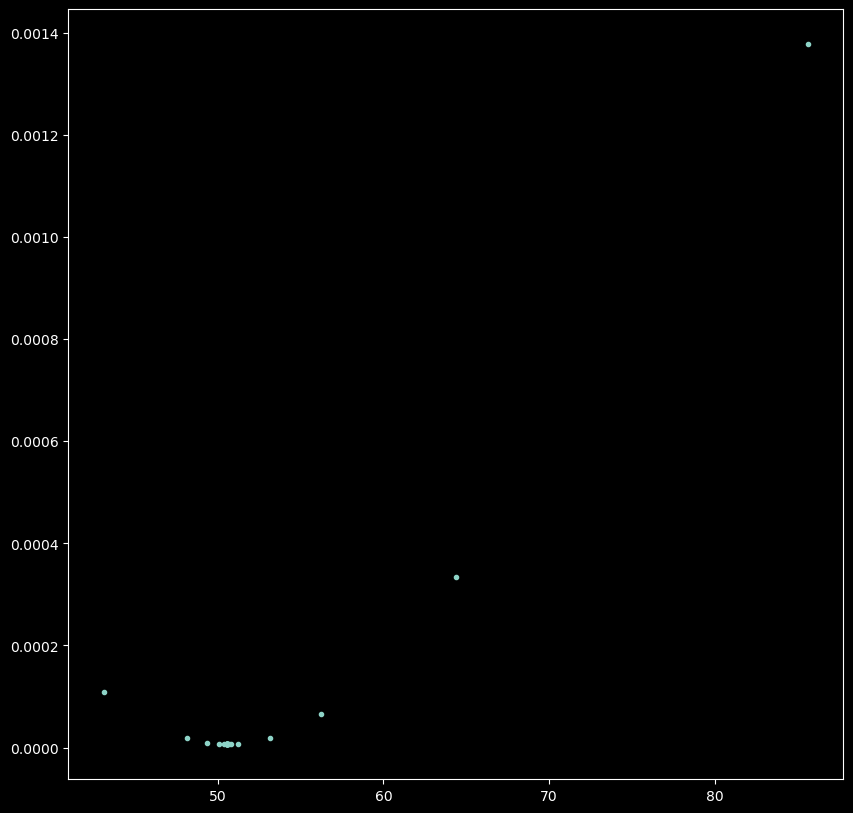

Exception in callback ELLx._update_status()
handle: <TimerHandle when=5211.256 ELLx._update_status()>
Traceback (most recent call last):
  File "c:\Users\Experiment\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Experiment\anaconda3\Lib\site-packages\thorlabs_elliptec\__init__.py", line 413, in _update_status
    reply_data = self._write_command("gs")
                 ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Experiment\anaconda3\Lib\site-packages\thorlabs_elliptec\__init__.py", line 444, in _write_command
    self._port.write(bytearray(request_data + "\r\n", "ascii"))
  File "c:\Users\Experiment\anaconda3\Lib\site-packages\serial\serialwin32.py", line 317, in write
    raise SerialException("WriteFile failed ({!r})".format(ctypes.WinError()))
serial.serialutil.SerialException: WriteFile failed (PermissionError(13, 'Access is denied.', None, 5))


In [38]:
waveplateCal=AlignPwrMetertLib.WavePlateAngleCalibration(PwrMeterObj,RotaMountObj,30,120)
Xmin,yMin=waveplateCal.PerformWavePlateAlignment()
print(Xmin,yMin)
plt.plot(waveplateCal.Angles,waveplateCal.powerReading,'.')

del waveplateCal

## Set the Rotation Mounts to the optics zero point

In [30]:
RotaMountObj.AngleOffset[1]=21.872

In [63]:
RotaMountObj.SetAngle(0,0)
RotaMountObj.SetAngle(22.5,1)


(33.499, 22.499000000000024)

In [36]:
RotaMountObj.SetAngle(0)

(15.903, 0.004000000000001336)

In [8]:
RotaMountObj.SetAngle(20.5,1)

(42.368, 20.496000000000002)

## Set the rotation mount to a angle pair relation

In [58]:
RotaMountObj.SetAnglePair(0,1,5)

5 5.000999999999998 54.003
28.656780422709623 28.647 48.619


(5.000999999999998, 28.647)

# Lanuch the PiezoMount

In [52]:
PiezoMount=Piezolib.PiezoStrainGaugeObj()

0
1
A conection has been made to  KPC101 Piezo Controller
Setting Zero Point


## Test the Piezo mount by geting its current position

In [5]:
# print(PiezoMount.CurrentPostion)
# newPos=PiezoMount.SetPosition(10.003)
# print(newPos)
a=PiezoMount.GetPosition()
print(a)

0


In [98]:
PiezoMount.SetPosition(0.75)

# Lauch TimeTagger Thread

In [59]:
del taggerObj

In [53]:
# del taggerObj
taggerObj = TimeTaggerMod.TimeTaggerInterface([1,2])

2
New trigger level: 0.22599999606609344
New trigger level: 0.22599999606609344


# change timetagger properties

In [12]:
taggerObj.setCountingTime(0.1*1e12)
taggerObj.setTriggerLevel(1, 0.268)
# taggerObj.setTriggerLevel(2, 0.113)
# taggerObj.setTriggerLevel(2, 0.3)

taggerObj.setBinWidth(1)
taggerObj.setBinNumber(3000)
taggerObj.setDelayTime(1,0)
print(taggerObj.DelayTime[0],taggerObj.DelayTime[1])

New trigger level: 0.2680000066757202
[0]
0
0
0 6200


In [9]:
import multiprocessing

arr = multiprocessing.Array('i', [1, 2, 3, 4, 5])
number_to_find = 3

indices = [i for i in range(len(arr)) if arr[i] == number_to_find]

if indices:
    print(f"Found {number_to_find} at indices {indices[0]}")
else:
    print(f"{number_to_find} not found in the array")

Found 3 at indices 2


In [117]:
taggerObj.setDelayTime(1)
print(taggerObj.DelayTime.value)

1


# run a trigger level sweep Need to put this into a function

New trigger level: 0.10000000149011612
28 0 0.1
New trigger level: 0.10499999672174454
20 1 0.10505050505050506
New trigger level: 0.11010000109672546
11 2 0.1101010101010101
New trigger level: 0.1151999980211258
17 3 0.11515151515151516
New trigger level: 0.12020000070333481
13 4 0.12020202020202021
New trigger level: 0.12520000338554382
14 5 0.12525252525252525
New trigger level: 0.13030000030994415
16 6 0.1303030303030303
New trigger level: 0.13539999723434448
10 7 0.13535353535353536
New trigger level: 0.1404000073671341
17 8 0.14040404040404042
New trigger level: 0.14550000429153442
13 9 0.14545454545454545
New trigger level: 0.15049999952316284
16 10 0.15050505050505053
New trigger level: 0.15549999475479126
18 11 0.15555555555555556
New trigger level: 0.16060000658035278
13 12 0.1606060606060606
New trigger level: 0.1657000035047531
12 13 0.16565656565656567
New trigger level: 0.17069999873638153
16 14 0.17070707070707072
New trigger level: 0.17569999396800995
10 15 0.1757575757

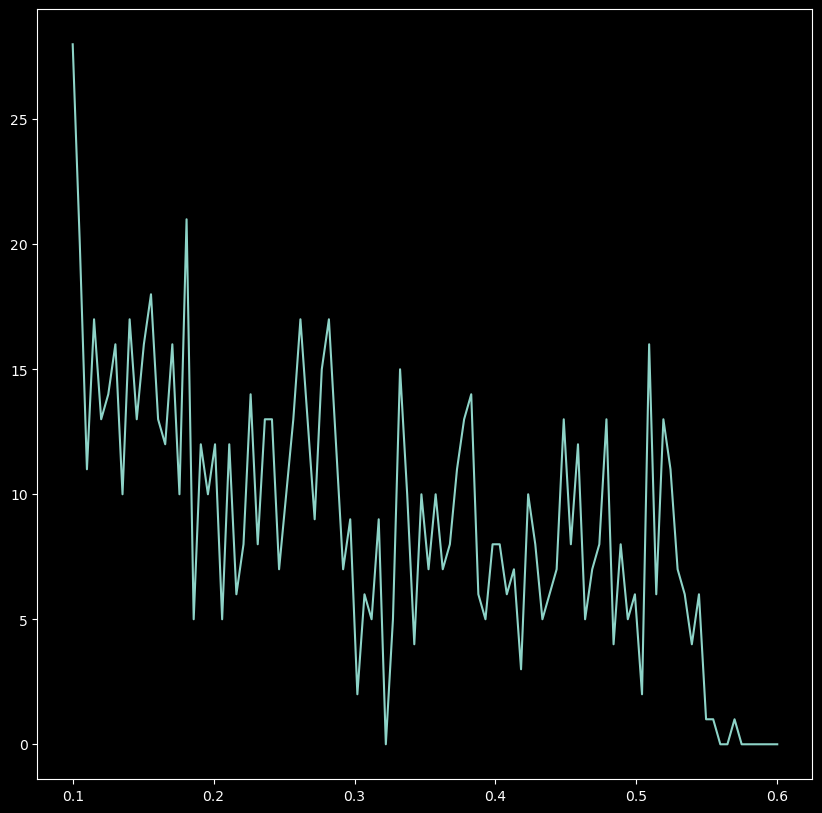

In [15]:
voltmin=0.1
voltmax=0.6
VoltCount=int(voltmax-voltmin/0.001)
VoltCount=100
TTchannel=3
voltageVal=np.linspace(voltmin,voltmax,VoltCount)
countdata_arr=np.zeros(VoltCount)
taggerObj.setSingleCaptureMode()
for ivolt in range(VoltCount):
    voltval=voltageVal[ivolt]
    taggerObj.setTriggerLevel(TTchannel, voltval)
    countsdata=taggerObj.getCoincidences()
    countdata_arr[ivolt]=countsdata[1]
    print(countsdata[1],ivolt,voltval)
taggerObj.setContinuousCaptureMode()
plt.plot(voltageVal,countdata_arr)

# plot a count graph or a correlation graph

4750
4.75e-09 4.75e-09 2.4025e-07
235500


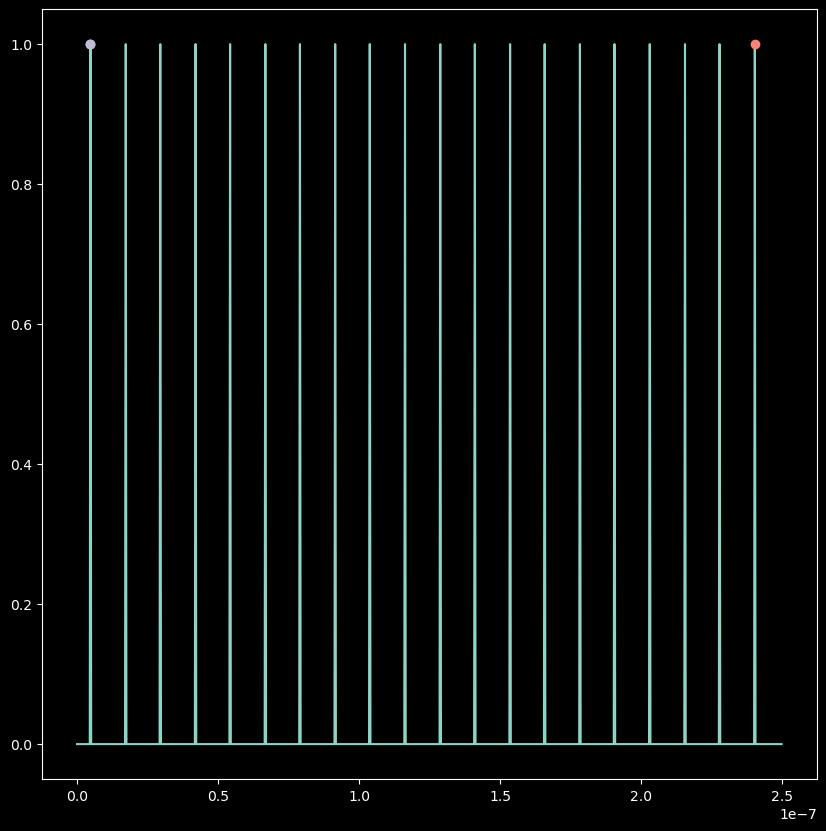

In [126]:
# CorrData=taggerObj.getCorrelatinoGraph()
CorrData=taggerObj.getCounterGraph()

plt.plot(CorrData[0,:]/1e12,CorrData[1,:])
maxIdax=np.argmax(CorrData[1,:])
print(CorrData[0,maxIdax])
idx_l,idx_r, fwhm=FWHMFunc.fwhm_1d(CorrData[1,:])

print(CorrData[0,idx_l]/1e12,CorrData[0,maxIdax]/1e12,CorrData[0,idx_r]/1e12)
print(CorrData[0,idx_r]-CorrData[0,idx_l])


plt.plot(CorrData[0,idx_l]/1e12,CorrData[1,idx_l],'.',markersize=12)
plt.plot(CorrData[0,maxIdax]/1e12,CorrData[1,maxIdax],'.',markersize=12)
plt.plot(CorrData[0,idx_r]/1e12,CorrData[1,idx_r],'.',markersize=12)



# Launch the timetagger that isn't running on thread

In [29]:
TimeTagger.freeTimeTagger(tagger)


True

### create the time tagger object

In [60]:
tagger = TimeTagger.createTimeTagger()

### Set global properties of the time tagger object 

In [61]:

#turn on the conditional filter
tagger.setConditionalFilter(trigger=[1,2], filtered=[4])
#tagger.setConditionalFilter(trigger=[1,2,3], filtered=[4])
#Turn off the conditional filter
# tagger.clearConditionalFilter()
sm = TimeTagger.SynchronizedMeasurements(tagger)
tagger.setInputDelay(1, 970)
tagger.setInputDelay(2, 900)
#tagger.setInputDelay(3, 2650)
tagger.setInputDelay(4, 6200)




In [28]:
tagger.getTriggerLevel(4)

0.5

# Make some correlation measurements classes

In [62]:
binCount=3000
channels=[1,2,3]
#channels=[1,2,3]
# ChannelCount=len(channels)
corr_list = list()
for ch in channels:
    corr_list.append(TimeTagger.Correlation(sm.getTagger(), channel_1=4, channel_2=ch, binwidth=1, n_bins=binCount))


corr_list.append(TimeTagger.Correlation(sm.getTagger(), channel_1=channels[0], channel_2=channels[1], binwidth=1, n_bins=binCount))
corr_list.append(TimeTagger.Correlation(sm.getTagger(), channel_1=channels[0], channel_2=channels[2], binwidth=1, n_bins=binCount))
corr_list.append(TimeTagger.Correlation(sm.getTagger(), channel_1=channels[1], channel_2=channels[2], binwidth=1, n_bins=binCount))


    
# for ch in channels:   
#     corr_list.append(TimeTaggerCustomObj.CustomCorrelationMeasurement(sm.getTagger(),[4], [ch], binwidth=1, n_bins=binCount,MeasurementType=1))
  
corr_list.append(TimeTaggerCustomObj.CustomCorrelationMeasurement(sm.getTagger(),[4], channels, binwidth=1, n_bins=binCount,MeasurementType=100))
# corr_list.append(TimeTagger.FileWriter(sm.getTagger(),'dump1234.ttbin',[1,2,3,4]))
# ChannelCountTotal=len(corr_list)
ChannelCount=len(corr_list)

In [37]:
ChannelCount

6

# Take a single correlation measurement to make sure the delay is correct

0 0
876.0465116279067 779.0
861.5417490118577 762.0


<Figure size 500x500 with 0 Axes>

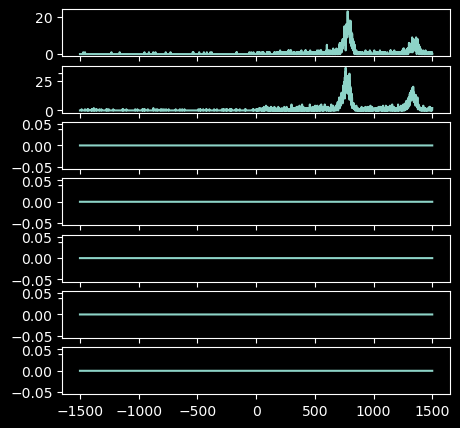

In [67]:
# tagger.setInputDelay(3, 0)
tagger.setInputDelay(1, 6220-(700-81+35))
tagger.setInputDelay(2, 6220-700-90)
#tagger.setInputDelay(1, 2150-586-6-6+30+6)
#tagger.setInputDelay(2, 1800-317+12-19+4+10)
#tagger.setInputDelay(3, 1325-302+3)
tagger.setInputDelay(4, 0)
CountTime=40
timeData,CorrData, CorrDataNorm=  TimetaggerFunc.GetCorrelationdata(sm,corr_list,CountTime,3000,PlotResutls=True)

# If you want to get the time delay you can use either of the lines below
# TimetaggerFunc.CalculateTimeDelay(timeData,CorrDataNorm)
AvgTimeDelay_0,PeakTimeDelay_0 = TimetaggerFunc.CalculateTimeDelay(timeData[0,:],CorrDataNorm[0,:])
print(AvgTimeDelay_0,PeakTimeDelay_0)
AvgTimeDelay_1,PeakTimeDelay_1 =TimetaggerFunc.CalculateTimeDelay(timeData[0,:],CorrDataNorm[1,:])
print(AvgTimeDelay_1,PeakTimeDelay_1)
#AvgTimeDelay_2,PeakTimeDelay_2 =TimetaggerFunc.CalculateTimeDelay(timeData[0,:],CorrDataNorm[2,:])
#print(AvgTimeDelay_2,PeakTimeDelay_2)


# Read Raw tag files


In [68]:
#Read the Raw tages
tags=TimetaggerFunc.ReadRawTagFiles(config.PATH_TO_TIMETAGGER_FOLDER+"Data\\RawTimeTags")
#Move the Raw tags
# TimetaggerFunc.MoveRawTags(config.PATH_TO_TIMETAGGER_FOLDER+"Data\\RawTimeTags","Data\\RawTags\\")

Available RAM: 5.42 GB
File can be loaded. File size is 0.0005134753882884979 GB


[1 2 3 4]


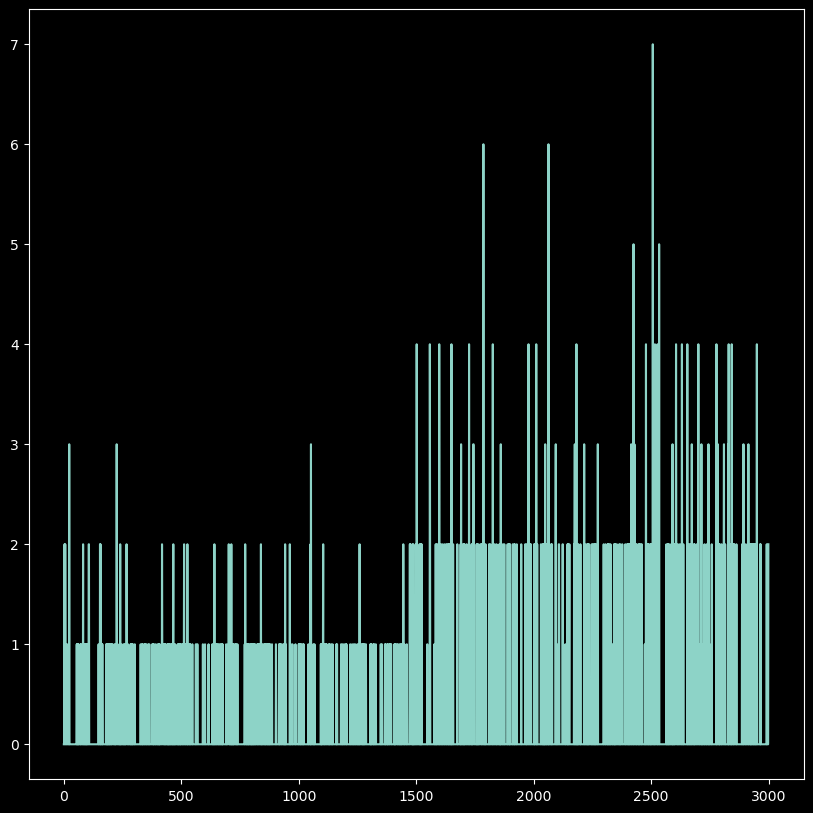

In [25]:
# Pass the Raw tags to a function for processing/performing measurements
binCount=3000
data = np.zeros((binCount), dtype=np.uint64)
unique_rows = np.unique(tags['channel'], axis=0)
print(unique_rows)
_,ch1,ch2=TimeTaggerCustomObj.fast_process_Correlations(tags,
                data,
                unique_rows[-1],          
                unique_rows[0],
                binCount,
                1,
                0)
print(ch1,ch2)
plt.plot(data)

In [69]:
# Setup distance array for peizo mount
CountTime=40
maxdist=4 # this is in micros
mindist=0 # this is in micros
distSpacing_ideal =0.1 #can go as low as 0.01
distCount=int((maxdist-mindist)/distSpacing_ideal)
distArr_ideal=np.linspace(mindist,maxdist,distCount)
distSpacing=distArr_ideal[1]-distArr_ideal[0]
print(distCount,distCount/CountTime/60,distSpacing_ideal,distSpacing)
# distCount=10

40 0.016666666666666666 0.1 0.10256410256410256


# Do Experiment Measurment

In [70]:
#RotaMountObj.SetAngle(0,0)
#RotaMountObj.SetAngle(0,1)

# Mount1Angle = RotaMountObj.SetAngle(0,0)
# Mount2Angle = RotaMountObj.SetAngle(45,1)

Mount1Angle,Mount2Angle=RotaMountObj.SetAnglePair(0,1,5)

5 4.9979999999999976 54.0
28.656780422709623 28.647 48.619


40 0.1 0.10256410256410256
0 0
0.0 0.0
0 0
0.102542191839351 0.10256410256410256
0.102542191839351
0 0
0.205084383678701 0.20512820512820512
0.205084383678701
0 0
0.308236945707572 0.3076923076923077
0.308236945707572
0 0
0.409558397167882 0.41025641025641024
0.409558397167882
0 0
0.512710959196753 0.5128205128205128
0.512710959196753
0 0
0.615253151036104 0.6153846153846154
0.615253151036104
0 0
0.717795342875454 0.717948717948718
0.717795342875454
0 0
0.820337534714804 0.8205128205128205
0.820337534714804
0 0
0.922879726554155 0.923076923076923
0.922879726554155
0 0
1.02542191839351 1.0256410256410255
1.02542191839351
0 0
1.12796411023286 1.1282051282051282
1.12796411023286
0 0
1.23050630207221 1.2307692307692308
1.23050630207221
0 0
1.33304849391156 1.3333333333333333
1.33304849391156
0 0
1.43620105594043 1.435897435897436
1.43620105594043
0 0
1.53874324777978 1.5384615384615383
1.53874324777978
0 0
1.64067506942961 1.641025641025641
1.64067506942961
0 0
1.74382763145848 1.743589743

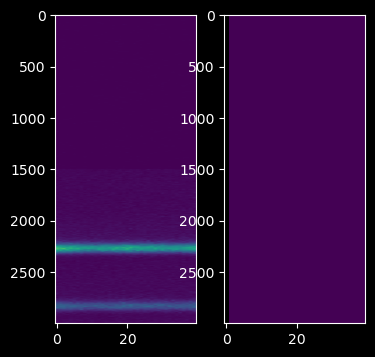

In [71]:
# Setup distance array for peizo mount
CountTime=40
maxdist=4 # this is in micros
mindist=0 # this is in micros
distSpacing_ideal =0.1 #can go as low as 0.01
distCount=int((maxdist-mindist)/distSpacing_ideal)
distArr_ideal=np.linspace(mindist,maxdist,distCount)
distSpacing=distArr_ideal[1]-distArr_ideal[0]
print(distCount,distSpacing_ideal,distSpacing)
# distCount=10

#Set mount to zero
PiezoMount.SetPosition(0.0001)

# make all the arrays for the data
timeDataAll=np.zeros((ChannelCount,binCount,distCount))
CorrDataAll=np.zeros((ChannelCount,binCount,distCount))
CorrDataNormAll=np.zeros((ChannelCount,binCount,distCount))
CorrDataAdd=np.zeros((binCount,distCount))
CorrDataNormAdd=np.zeros((binCount,distCount))
distArr_measured=np.zeros((distCount))
PlotDuringMeasument=True

if (PlotDuringMeasument):
    plt.figure(1,figsize=(4,4))
    
for idist in range(distCount):
    
    #################################
    #take correlations measurment
    #################################
    timeData , CorrData, CorrDataNorm = TimetaggerFunc.GetCorrelationdata(sm,corr_list,CountTime,binCount)
    timeDataAll[:,:,idist]=timeData
    CorrDataAll[:,:,idist]= CorrData
    CorrDataNormAll[:,:,idist]=CorrDataNorm
    CorrDataAdd[:,idist]=np.sum(CorrData,axis=0)
    CorrDataNormAdd[:,idist]=np.sum(CorrDataNorm,axis=0)
    
    #################################
    # Move the the BeamSplitter
    #################################
    if (idist==0):
        distArr_measured[idist]=float(str(PiezoMount.GetPosition()))
        print(distArr_measured[idist],distArr_ideal[idist])
    else:
       
        distArr_measured[idist]=float(str(PiezoMount.SetPosition(distArr_ideal[idist])))
        print(distArr_measured[idist],distArr_ideal[idist])
        print(PiezoMount.GetPosition())
        
    #################################
    #save the data While we are going. This is really ineffiecent but dont really care at the moment
    #################################
    np.savez_compressed('Data\\batch_data.npz',
                        timeDataAll=timeDataAll, CorrDataAll=CorrDataAll
                        ,CorrDataNormAll=CorrDataNormAll
                        ,CorrDataAdd=CorrDataAdd
                        ,CorrDataNormAdd=CorrDataNormAdd
                        ,distArr_ideal=distArr_ideal
                        ,distArr_measured=distArr_measured
                        ,AngleOfFirstWaveplate=Mount1Angle
                        ,AngleOfSecondWaveplate=Mount2Angle
                        )
    TimetaggerFunc.MoveRawTags(config.PATH_TO_TIMETAGGER_FOLDER+"Data\\RawTimeTags","Data\\RawTags\\RawtagMountPos"+str(idist)+"\\")
    # save the data So far using pickle. I think npz is faster
    # with open('Data\\batch_data.pkl', 'wb') as f:
    #     pickle.dump([timeDataAll, CorrDataAll,CorrDataNormAll,CorrDataAdd,CorrDataNormAdd], f)
    
    #################################
    # plot the result while we are giong
    #################################
    if (PlotDuringMeasument):
        plt.subplot(1,2,1)
        plt.imshow(CorrDataAdd,aspect='auto')
        plt.subplot(1,2,2)
        plt.imshow(CorrDataNormAdd,aspect='auto')
        plt.show
        
# 


## Angle Sweep 

In [35]:



step_angle = 0.5
start_angle = 0.5
stop_angle = 20 + step_angle
angleCount=int((stop_angle-start_angle)/step_angle)


angle_arr=np.linspace(start_angle,stop_angle,angleCount)

for iangle in range(angleCount): 
    Mount1Angle, Mount2Angle = RotaMountObj.SetAnglePair(0,1,angle_arr[iangle])
    
    # Setup distance array for peizo mount
    CountTime=40
    maxdist=2 # this is in micros
    mindist=0 # this is in micros
    distSpacing_ideal =0.05 #can go as low as 0.01
    distCount=int((maxdist-mindist)/distSpacing_ideal)
    distArr_ideal=np.linspace(mindist,maxdist,distCount)
    distSpacing=distArr_ideal[1]-distArr_ideal[0]
    print(distCount,distSpacing_ideal,distSpacing)
    # distCount=10

    #Set mount to zero
    PiezoMount.SetPosition(0.0001)

    # make all the arrays for the data
    timeDataAll=np.zeros((ChannelCount,binCount,distCount))
    CorrDataAll=np.zeros((ChannelCount,binCount,distCount))
    CorrDataNormAll=np.zeros((ChannelCount,binCount,distCount))
    CorrDataAdd=np.zeros((binCount,distCount))
    CorrDataNormAdd=np.zeros((binCount,distCount))
    distArr_measured=np.zeros((distCount))
    PlotDuringMeasument=True

    if (PlotDuringMeasument):
        plt.figure(1,figsize=(4,4))
        
    for idist in range(distCount):
        
        #################################
        #take correlations measurment
        #################################
        timeData , CorrData, CorrDataNorm = TimetaggerFunc.GetCorrelationdata(sm,corr_list,CountTime,binCount)
        timeDataAll[:,:,idist]=timeData
        CorrDataAll[:,:,idist]= CorrData
        CorrDataNormAll[:,:,idist]=CorrDataNorm
        CorrDataAdd[:,idist]=np.sum(CorrData,axis=0)
        CorrDataNormAdd[:,idist]=np.sum(CorrDataNorm,axis=0)
        
        #################################
        # Move the the BeamSplitter
        #################################
        if (idist==0):
            distArr_measured[idist]=float(str(PiezoMount.GetPosition()))
            print(distArr_measured[idist],distArr_ideal[idist])
        else:
        
            distArr_measured[idist]=float(str(PiezoMount.SetPosition(distArr_ideal[idist])))
            print(distArr_measured[idist],distArr_ideal[idist])
            print(PiezoMount.GetPosition())
            
        #################################
        #save the data While we are going. This is really ineffiecent but dont really care at the moment
        #################################
        
        
        np.savez_compressed('Data\\AngleSweep\\batch_data_angle_' + str(iangle),
                            timeDataAll=timeDataAll, CorrDataAll=CorrDataAll
                            ,CorrDataNormAll=CorrDataNormAll
                            ,CorrDataAdd=CorrDataAdd
                            ,CorrDataNormAdd=CorrDataNormAdd
                            ,distArr_ideal=distArr_ideal
                            ,distArr_measured=distArr_measured
                            ,AngleOfFirstWaveplate=Mount1Angle
                            ,AngleOfSecondWaveplate=Mount2Angle
                            )
        # save the data So far using pickle. I think npz is faster
        # with open('Data\\batch_data.pkl', 'wb') as f:
        #     pickle.dump([timeDataAll, CorrDataAll,CorrDataNormAll,CorrDataAdd,CorrDataNormAdd], f)
        
        #################################
        # plot the result while we are giong
        #################################
        if (PlotDuringMeasument):
            plt.subplot(1,2,1)
            plt.imshow(CorrDataAdd,aspect='auto')
            plt.subplot(1,2,2)
            plt.imshow(CorrDataNormAdd,aspect='auto')
            plt.show
    






SyntaxError: invalid syntax (3876648163.py, line 8)

In [36]:
#testing anglesweep filenames

step_angle = 0.5
start_angle = 0.5
stop_angle = 20 + step_angle
angleCount=int((stop_angle-start_angle)/step_angle)


angle_arr=np.linspace(start_angle,stop_angle,angleCount)

for iangle in range(angleCount):
    #filenameiter = f"{'sweepdata'}_{iangle:.1f}.npz"
    np.savez_compressed('Data\\AngleSweep\\batch_data_angle_' + str(iangle))      ##checking saving...will delete the files 
    




# Load data

In [ ]:
Dataraw = np.load('Data\\batch_data.npz')
timeDataAll=Dataraw['timeDataAll']
CorrDataAll=Dataraw['CorrDataAll']
CorrDataNormAll=Dataraw['CorrDataNormAll']
CorrDataAdd=Dataraw['CorrDataAdd']
CorrDataNormAdd=Dataraw['CorrDataNormAdd']

# every thing below here is garabage just playing around with stuff